### Author : Priyanka Balasahen Navale

### Mail_id : dspriyankanavale@gmail.com

<h2 style='color:blue'> Import Libraries</h2>

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score, mean_squared_error
from math import sqrt

<h2 style='color:blue'> Read Dataset</h2>

In [2]:
df = pd.read_csv('salary,satisfaction - salary,satisfaction.csv')

In [3]:
# showes first five rows of data
df.head()

,id,Target_Salary,Target_Satisfied,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,...,homeaddress,latitude,longitude,PHONE,officeaddress,website,dateAdded,previousaddress,phones,CrimeTime
0,68407277,42405.00,0,"$3,600.00",Account Manager,CONTRACT REVIEWER (OFFICE OF L,Strategy & Analytics,Division of Economic & Financial Opportunity (...,1.\tA baccalaureate degree from an accredited ...,•\tExcellent interpersonal and organizational ...,...,"346 W Magnolia Ave Auburn, AL 36832 US",32.606813,-85.487328,(91) 555 22 82,"PO Box 4653, Stockton, California, 95204",http://www.valleybrew.com/,2016-04-22T02:47:48Z,1045 San Pablo Ave,(510) 528-2375,23:30:00
1,68355089,60740.00,1,"$24,700.00","EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,Tech Talent Pipeline,The New York City Department of Small Business...,1. A baccalaureate degree from an accredited c...,NaN,...,"300 20th St S Birmingham, AL 35233 US",33.509722,-86.802756,NaN,"157 Adams St., Stockton, California, 95204",http://www.valleybrew.com/,2016-04-22T02:47:48Z,1045 San Pablo Ave,(510) 528-2375,23:00:00
2,68341763,51907.68,0,"$20,000.00",Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,Management Services Department,"Under direct supervision, assist in the routin...",1. Three years of full-time satisfactory exper...,1. A High School Diploma or GED. 2. CDL Dri...,...,"3220 Morrow Rd Birmingham, AL 35235 US",33.595581,-86.647437,NaN,"1950 W Freemont, Stockton, California, 95203",http://www.valleybrew.com/,2016-04-22T02:47:48Z,1045 San Pablo Ave,(510) 528-2375,22:53:00
3,66310712,51907.68,0,"$35,000.00",Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,Management Services Department,"Under direct supervision, assist in the routin...",1. Three years of full-time satisfactory exper...,1. A High School Diploma or GED. 2. CDL Dri...,...,"4719 Highway 280 Birmingham, AL 35242 US",33.422582,-86.698279,2125557818,"102 S. State St., Ukiah, California, 95482",http://www.ukiahbrewingco.com/,2016-04-22T02:47:48Z,1045 San Pablo Ave,(510) 528-2375,22:50:00
4,68476807,35.00,1,"$10,400.00",Temporary Painter,PAINTER,Dept of Management & Planning,Responsibilities of selected candidates will i...,1. Five years of full-time satisfactory experi...,NaN,...,"1821 Cherokee Ave SW Cullman, AL 35055 US",34.154134,-86.841220,26.47.1555,"13011 Newport Ave. #100, Tustin, California, 9...",http://www.tustinbrewery.com/,2016-04-22T02:47:48Z,1045 San Pablo Ave,(510) 528-2375,22:31:00


In [4]:
# find how many rows and columns in our dataframe
df.shape

(2946, 83)

In [5]:
# identify type of our dataframe 
type(df)

pandas.core.frame.DataFrame

In [6]:
# showes null value and data type of perticular table
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2946 entries, 0 to 2945
Data columns (total 83 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          2946 non-null   int64  
 1   Target_Salary               2946 non-null   float64
 2   Target_Satisfied            2946 non-null   int64  
 3   LOAN_AMT                    2946 non-null   object 
 4   Business Title              2946 non-null   object 
 5   Civil Service Title         2946 non-null   object 
 6   Division/Work Unit          2946 non-null   object 
 7   Job Description             2946 non-null   object 
 8   Minimum Qual Requirements   2926 non-null   object 
 9   Preferred Skills            2553 non-null   object 
 10  Additional Information      1854 non-null   object 
 11  To Apply                    2945 non-null   object 
 12  Hours/Shift                 884 non-null    object 
 13  Residency Requirement       2942 

In [7]:
# gives the sum of all null values in perticular table
df.isnull().sum()

id                    0
Target_Salary         0
Target_Satisfied      0
LOAN_AMT              0
Business Title        0
                   ... 
website             547
dateAdded             0
previousaddress       0
phones                0
CrimeTime             0
Length: 83, dtype: int64

In [8]:
# takes all column names which is present in our dataset 
df.columns

Index(['id', 'Target_Salary', 'Target_Satisfied', 'LOAN_AMT', 'Business Title',
       'Civil Service Title', 'Division/Work Unit', 'Job Description',
       'Minimum Qual Requirements', 'Preferred Skills',
       'Additional Information', 'To Apply', 'Hours/Shift',
       'Residency Requirement', 'Posting Date', 'Posting Updated',
       'Process Date', 'FormalEducation', 'UndergradMajor', 'CompanySize',
       'DevType', 'YearsCoding', 'YearsCodingProf', 'HopeFiveYears',
       'JobSearchStatus', 'LastNewJob', 'UpdateCV', 'CommunicationTools',
       'TimeFullyProductive', 'EducationTypes', 'SelfTaughtTypes',
       'TimeAfterBootcamp', 'HackathonReasons', 'AgreeDisagree1',
       'AgreeDisagree2', 'AgreeDisagree3', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'FrameworkWorkedWith',
       'FrameworkDesireNextYear', 'IDE', 'OperatingSystem', 'Methodology',
       'V

<h2 style = 'color:blue'>Feature Engineering</h2>

In [9]:
df1 = df[['id', 'Target_Salary', 'Target_Satisfied', 'LOAN_AMT','loan_status',
       'Minimum Qual Requirements', 'Preferred Skills','To Apply',
       'Residency Requirement','FormalEducation', 'UndergradMajor',
       'DevType', 'YearsCoding', 'YearsCodingProf', 'HopeFiveYears',
       'JobSearchStatus', 'LastNewJob', 'UpdateCV', 'Age', 'term','pymnt_plan',
       'orignal_website_directory', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'earliest_cr_line',
       'last_pymnt_amnt','emp_length', 'your_favoritearticle_today', 'url','dateAdded', 'previousaddress', 'phones', 'CrimeTime']]

In [11]:
df1.isnull().sum()

id                               0
Target_Salary                    0
Target_Satisfied                 0
LOAN_AMT                         0
loan_status                      0
Minimum Qual Requirements       20
Preferred Skills               393
To Apply                         1
Residency Requirement            4
FormalEducation                 52
UndergradMajor                 322
DevType                         45
YearsCoding                      3
YearsCodingProf                408
HopeFiveYears                  469
JobSearchStatus                435
LastNewJob                     447
UpdateCV                       857
Age                            919
term                             0
pymnt_plan                       0
orignal_website_directory        0
purpose                          0
title                           64
zip_code                         0
addr_state                       0
dti                              0
earliest_cr_line                 0
last_pymnt_amnt     

**emp_length contain symbols like > , + and string we need to remove symbols and convert it into int**

In [12]:
df1['emp_length'].unique()

array(['< 1 year', nan, '10+ years', '3 years', '4 years', '6 years',
       '1 year', '7 years', '8 years', '5 years', '2 years', '9 years'],
      dtype=object)

In [13]:
df1['emp_length'].value_counts(ascending=False)

10+ years    322
3 years       50
6 years       50
< 1 year      49
8 years       49
2 years       48
5 years       48
4 years       25
7 years       25
1 year        25
9 years       24
Name: emp_length, dtype: int64

In [14]:
df1['emp_length'] = df1['emp_length'].apply(lambda x: str(x).replace ('<','') if '<' in str(x) else str(x))

<ipython-input-14-d6171c016edb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['emp_length'] = df1['emp_length'].apply(lambda x: str(x).replace ('<','') if '<' in str(x) else str(x))


In [15]:
df1['emp_length'] = df1['emp_length'].apply(lambda x: str(x).replace ('+','') if '+' in str(x) else str(x))

<ipython-input-15-3f33d82df773>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['emp_length'] = df1['emp_length'].apply(lambda x: str(x).replace ('+','') if '+' in str(x) else str(x))


In [16]:
df1['emp_length'].unique()

array([' 1 year', 'nan', '10 years', '3 years', '4 years', '6 years',
       '1 year', '7 years', '8 years', '5 years', '2 years', '9 years'],
      dtype=object)

In [17]:
df1['emp_length'] = df1['emp_length'].apply(lambda x: str(x.split(' ')[0]))

<ipython-input-17-e6015ab16bd1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['emp_length'] = df1['emp_length'].apply(lambda x: str(x.split(' ')[0]))


In [18]:
df1['emp_length'] = df1['emp_length'].apply(lambda x: str(x).replace ('nan','') if 'nan' in str(x) else str(x))

<ipython-input-18-d10da7369d0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['emp_length'] = df1['emp_length'].apply(lambda x: str(x).replace ('nan','') if 'nan' in str(x) else str(x))


In [19]:
df1['emp_length'].unique()

array(['', '10', '3', '4', '6', '1', '7', '8', '5', '2', '9'],
      dtype=object)

In [20]:
df1.emp_length = df1.emp_length.fillna(df1.emp_length.mean())

C:\Users\SHRAV\Anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [21]:
df1.isnull().sum()

id                              0
Target_Salary                   0
Target_Satisfied                0
LOAN_AMT                        0
loan_status                     0
Minimum Qual Requirements      20
Preferred Skills              393
To Apply                        1
Residency Requirement           4
FormalEducation                52
UndergradMajor                322
DevType                        45
YearsCoding                     3
YearsCodingProf               408
HopeFiveYears                 469
JobSearchStatus               435
LastNewJob                    447
UpdateCV                      857
Age                           919
term                            0
pymnt_plan                      0
orignal_website_directory       0
purpose                         0
title                          64
zip_code                        0
addr_state                      0
dti                             0
earliest_cr_line                0
last_pymnt_amnt                 0
emp_length    

**LOAN_AMT contain symbols like '$' , ',' . So we need to remove symbols and convert it into int**

In [22]:
df1['LOAN_AMT'] = df1['LOAN_AMT'].apply(lambda x: str(x).replace ('$','') if '$' in str(x) else str(x))

<ipython-input-22-dfe596f7bed7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['LOAN_AMT'] = df1['LOAN_AMT'].apply(lambda x: str(x).replace ('$','') if '$' in str(x) else str(x))


In [23]:
df1['LOAN_AMT'] = df1['LOAN_AMT'].apply(lambda x: str(x).replace (',','') if ',' in str(x) else str(x))

<ipython-input-23-93a6d896a14a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['LOAN_AMT'] = df1['LOAN_AMT'].apply(lambda x: str(x).replace (',','') if ',' in str(x) else str(x))


In [24]:
df1['LOAN_AMT'] = df1['LOAN_AMT'].apply(lambda x: float(x))

<ipython-input-24-2630f10dbbfb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['LOAN_AMT'] = df1['LOAN_AMT'].apply(lambda x: float(x))


In [25]:
df1.head()

,id,Target_Salary,Target_Satisfied,LOAN_AMT,loan_status,Minimum Qual Requirements,Preferred Skills,To Apply,Residency Requirement,FormalEducation,...,dti,earliest_cr_line,last_pymnt_amnt,emp_length,your_favoritearticle_today,url,dateAdded,previousaddress,phones,CrimeTime
0,68407277,42405.00,0,3600.0,Fully Paid,1.\tA baccalaureate degree from an accredited ...,•\tExcellent interpersonal and organizational ...,NaN,New York City residency is generally required ...,"Bachelor�s degree (BA, BS, B.Eng., etc.)",...,5.91,3-Aug,122.67,,https://www.reuters.com/article/us-tesla-crash...,nobell.it/70ffb52d079109dca5664cce6f317373782/...,2016-04-22T02:47:48Z,1045 San Pablo Ave,(510) 528-2375,23:30:00
1,68355089,60740.00,1,24700.0,Fully Paid,1. A baccalaureate degree from an accredited c...,NaN,"In addition to applying through this website, ...",New York City residency is generally required ...,"Bachelor�s degree (BA, BS, B.Eng., etc.)",...,16.06,Dec-99,926.35,,https://www.irishtimes.com/business/economy/un...,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,2016-04-22T02:47:48Z,1045 San Pablo Ave,(510) 528-2375,23:00:00
2,68341763,51907.68,0,20000.0,Fully Paid,1. Three years of full-time satisfactory exper...,1. A High School Diploma or GED. 2. CDL Dri...,"Click the ""Apply Now"" button.",NYCHA has no residency requirements.,Associate degree,...,10.78,Aug-00,15813.30,,https://www.irishtimes.com/\t\t\t\t\t\t\t/life...,serviciosbys.com/paypal.cgi.bin.get-into.herf....,2016-04-22T02:47:48Z,1045 San Pablo Ave,(510) 528-2375,22:53:00
3,66310712,51907.68,0,35000.0,Current,1. Three years of full-time satisfactory exper...,1. A High School Diploma or GED. 2. CDL Dri...,"Click the ""Apply Now"" button.",NYCHA has no residency requirements.,"Bachelor�s degree (BA, BS, B.Eng., etc.)",...,17.06,8-Sep,829.90,10,https://www.aljazeera.com/news/2019/09/north-k...,mail.printakid.com/www.online.americanexpress....,2016-04-22T02:47:48Z,1045 San Pablo Ave,(510) 528-2375,22:50:00
4,68476807,35.00,1,10400.0,Fully Paid,1. Five years of full-time satisfactory experi...,NaN,"Click the ""Apply Now"" button.",NYCHA has no residency requirement.,Some college/university study without earning ...,...,25.37,Jun-98,10128.96,10,https://www.bbc.co.uk/news/av/uk-scotland-4956...,thewhiskeydregs.com/wp-content/themes/widescre...,2016-04-22T02:47:48Z,1045 San Pablo Ave,(510) 528-2375,22:31:00


In [26]:
# drop all null values from dataframe
df2 = df1.dropna()       

In [27]:
df2.isnull().sum()        

id                            0
Target_Salary                 0
Target_Satisfied              0
LOAN_AMT                      0
loan_status                   0
Minimum Qual Requirements     0
Preferred Skills              0
To Apply                      0
Residency Requirement         0
FormalEducation               0
UndergradMajor                0
DevType                       0
YearsCoding                   0
YearsCodingProf               0
HopeFiveYears                 0
JobSearchStatus               0
LastNewJob                    0
UpdateCV                      0
Age                           0
term                          0
pymnt_plan                    0
orignal_website_directory     0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
earliest_cr_line              0
last_pymnt_amnt               0
emp_length                    0
your_favoritearticle_today    0
url     

In [28]:
df2.shape        

(1393, 36)

<AxesSubplot:>

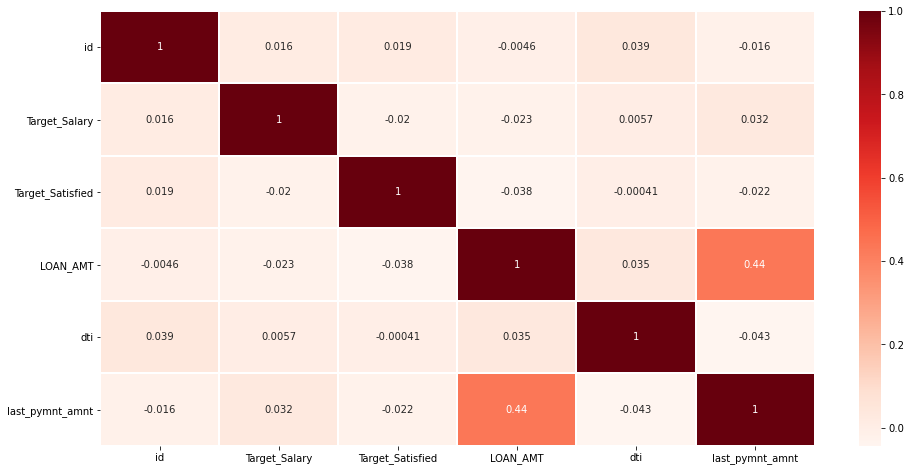

In [29]:
# plot heatmap for identify the correlation of our features
plt.figure(figsize=(16,8))
sns.heatmap(df2.corr(), linewidth = 1, cmap = 'Reds', annot = True)

<h2 style='color:blue'>Data Visualization</h2>

C:\Users\SHRAV\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Target_Satisfied', ylabel='count'>

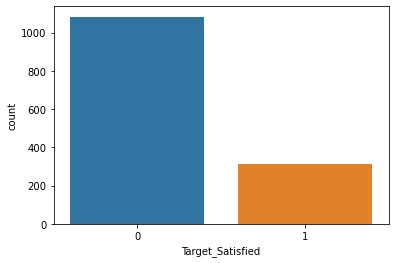

In [30]:
sns.countplot(df2['Target_Satisfied'])

C:\Users\SHRAV\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Target_Salary', ylabel='Density'>

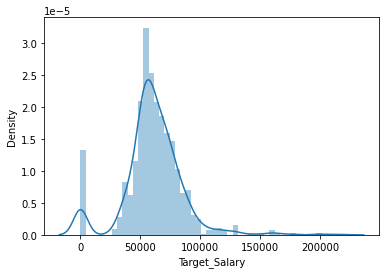

In [31]:
sns.distplot(df2['Target_Salary'])

In [32]:
df3 = df2[['id', 'Target_Salary', 'Target_Satisfied','dti','last_pymnt_amnt','LOAN_AMT', 'loan_status']]

In [33]:
df3.head()

,id,Target_Salary,Target_Satisfied,dti,last_pymnt_amnt,LOAN_AMT,loan_status
3,66310712,51907.68,0,17.06,829.90,35000.0,Current
6,68476668,50598.00,0,14.67,15681.05,20000.0,Fully Paid
7,67275481,50623.00,1,17.61,14618.23,20000.0,Fully Paid
8,68466926,90000.00,0,13.07,1814.48,10000.0,Fully Paid
17,68577849,49492.00,0,8.68,18004.90,18000.0,Fully Paid


In [34]:
#In our dataset column 'loan_status' is carry a catogorical value so for analysing data we want to try to simplier it into numerical form
df3 = pd.get_dummies(df3)

In [35]:
df3.head()

,id,Target_Salary,Target_Satisfied,dti,last_pymnt_amnt,LOAN_AMT,loan_status_Charged Off,loan_status_Current,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (31-120 days)
3,66310712,51907.68,0,17.06,829.90,35000.0,0,1,0,0,0
6,68476668,50598.00,0,14.67,15681.05,20000.0,0,0,1,0,0
7,67275481,50623.00,1,17.61,14618.23,20000.0,0,0,1,0,0
8,68466926,90000.00,0,13.07,1814.48,10000.0,0,0,1,0,0
17,68577849,49492.00,0,8.68,18004.90,18000.0,0,0,1,0,0


<h2 style='color:blue'>Feature Selection</h2>

In [36]:
X = df3.drop('Target_Satisfied', axis=1)
y = df3['Target_Satisfied']

<h2 style='color:blue'>Train_Test_Split</h2>

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [38]:
print('Shape of train_dataset :', X_train.shape, y_train.shape)
print('Shape of train_dataset :', X_test.shape, y_test.shape)

Shape of train_dataset : (1114, 10) (1114,)
Shape of train_dataset : (279, 10) (279,)


<h2 style='color:blue'>Model_Building for "Target_Satisfied"</h2>

In [39]:
def compute(y_test,y_pred):
    plt.figure(figsize=(7,3))
    cm=confusion_matrix(y_test,y_pred)
    class_label = ["Target_Satisfied", "Target_Not_Satisfied"]
    df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
    sns.heatmap(df_cm,annot=True,cmap='OrRd',linewidths=2,fmt='d')
    plt.title("Confusion Matrix",fontsize=15)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

**RandomForestClassifier**

In [40]:
start = time.time()

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)

end = time.time()

print(f'Execution time of model:{round((end - start), 5)} seconds')

Execution time of model:0.61318 seconds


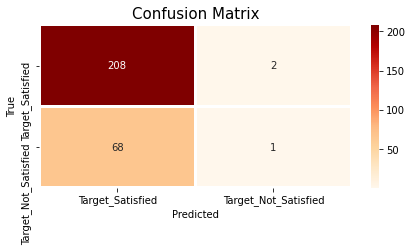

In [41]:
compute(y_test,y_pred)

In [42]:
model_rf.score(X_test, y_test)

0.7491039426523297

**DecisionTreeClassifier**

In [43]:
start = time.time()

model_DT = DecisionTreeClassifier()
model_DT.fit(X_train, y_train)
y_pred = model_DT.predict(X_test)

end = time.time()

print(f'Execution time of model : {round((end-start), 5)} seconds')


Execution time of model : 0.03235 seconds


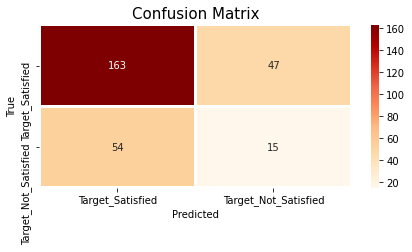

In [44]:
compute(y_test,y_pred)

In [45]:
model_DT.score(X_test, y_test)

0.6379928315412187

**LogisticRegression**

In [46]:
start = time.time()

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)

end = time.time() 

print(f'Execution time of model :{round((end-start), 5)} seconds')

Execution time of model :0.08703 seconds


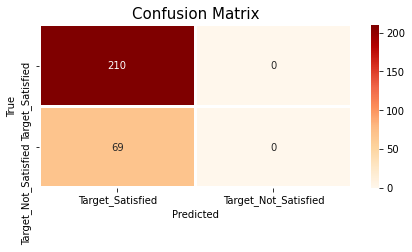

In [47]:
compute(y_test,y_pred)

In [48]:
model_lr.score(X_test, y_test)

0.7526881720430108

**KNeighborsClassifier**

In [49]:
start = time.time()

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)

end = time.time()

print(f'Execution time of model : {round((end - start), 5)} seconds')


Execution time of model : 0.10003 seconds


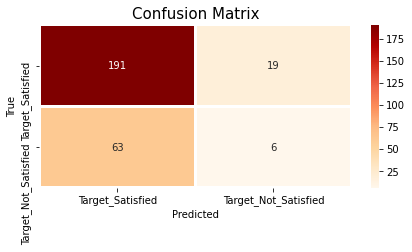

In [50]:
compute(y_test,y_pred)

In [51]:
model_knn.score(X_test, y_test)

0.7060931899641577

**SVC**

In [52]:
start = time.time()

model_svm = SVC()
model_svm.fit(X_train, y_train)
y_pred = model_svm.predict(X_test)

end = time.time()

print(f'Execution time of model: {round((end - start), 5)} seconds')


Execution time of model: 0.11302 seconds


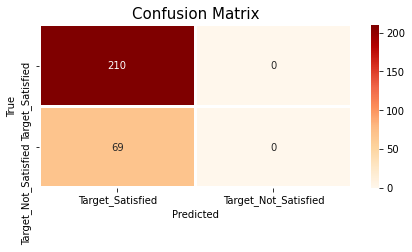

In [53]:
compute(y_test,y_pred)

In [54]:
model_svm.score(X_test, y_test)

0.7526881720430108

**From above different model building we clearly observed that Logistic Regression and SVM gives high accuracy accourding to other model**

<h2 style='color:blue'>Model_Building for "Target_Salary"</h2>

In [58]:
X = df3.drop('Target_Salary', axis = 1)
y = df3['Target_Salary']

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

**RandomForestRegressor**

In [61]:
start = time.time()

model_rfr = RandomForestRegressor()
model_rfr.fit(X_train, y_train)

end = time.time()

print(f'Execution time of model:{round((end - start), 5)} seconds')

Execution time of model:1.17431 seconds


In [62]:
y_pred = model_rfr.predict(X_test)

In [68]:
model_rfr.score(X_test, y_test)

-0.09573564960392189

In [80]:
meanSquaredError=mean_squared_error(y_test, y_pred)
rootMeanSquaredError = sqrt(meanSquaredError)/10000
print("RMSE:", rootMeanSquaredError)

RMSE: 2.8229114614145003
